<a href="https://www.linkedin.com/in/sunnybhuee/">**LinkedIn/SunnyBhuee**</a>

<a href="https://github.com/SunnyBhuee">**github/SunnyBhuee**</a>
<HR>
 # Digit Recognizer Project
 <HR>

**MNIST** is the classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. 

**Problem:** Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

**Data:** The data files ***train.csv*** and ***test.csv*** contain gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

**Approach:** We use the train dataset to test two approaches for this dataset i.e. ***K-Nearest Neighbors Classifier*** and ***Decision Tree Classifier***. Then the better of the two approaches is used to classify the images in the test dataset.

---
**Data Source:** Kaggle.com
---

In [11]:
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import csv
import random
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

files = []
import os
for dirname, _, filenames in os.walk('.\\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))

files = sorted(files, reverse=True)

print(files)

.\input\test.csv
.\input\train.csv
['.\\input\\train.csv', '.\\input\\test.csv']


In [2]:
def shape_printer(numpy_arr):
    assert type(numpy_arr) is str, 'Ensure Input is a String name of the Numpy Array'
    print('Shape of {} is {}'.format(numpy_arr,eval(numpy_arr).shape))
    
def img_visualizer(np_array):
    assert type(np_array) is np.ndarray, 'Ensure Input is a Numpy Array'
    return Image.fromarray((np_array.reshape((28,28))* 255).astype(np.uint8), "L")

In [3]:
X = pd.read_csv(files[0]).iloc[:,1:].values
y = pd.read_csv(files[0]).iloc[:,0].values
test_data = pd.read_csv(files[1])

shape_printer('X')
shape_printer('y')
shape_printer('test_data')

Shape of X is (42000, 784)
Shape of y is (42000,)
Shape of test_data is (28000, 784)


In [4]:
# Visualizing and checking label of a random image
index_of_img = random.randrange(X.shape[0])
print('Label of image at Index {} is {}'.format(index_of_img,y[index_of_img]))
img_visualizer(X[index_of_img])

Label of image at Index 25649 is 1


In [5]:
# Train and Test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, 
                                              test_size=0.2, 
                                              random_state=123)

In [6]:
shape_printer('X_tr')
shape_printer('y_tr')
shape_printer('X_test')
shape_printer('y_test')

Shape of X_tr is (33600, 784)
Shape of y_tr is (33600,)
Shape of X_test is (8400, 784)
Shape of y_test is (8400,)


In [47]:


accuracy_list = []
k_list = []
for k in range(1,4):
    startTime = datetime.now()
    print('-'*100)
    print('Running k = {}'.format(k))
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_tr, y_tr)
    accuracy_list.append(knn.score(X_test, y_test))
    k_list.append(k)
    print('Time taken for k = {}: from {} to {} = {}'.format(k,
                                                             startTime,
                                                             datetime.now(),                                                              
                                                             datetime.now() - startTime))

----------------------------------------------------------------------------------------------------
Running k = 1
Time taken for k = 1: from 2021-01-10 18:11:45.018447 to 2021-01-10 18:17:21.685051 = 0:05:36.666604
----------------------------------------------------------------------------------------------------
Running k = 2
Time taken for k = 2: from 2021-01-10 18:17:21.685051 to 2021-01-10 18:23:01.701862 = 0:05:40.016811
----------------------------------------------------------------------------------------------------
Running k = 3
Time taken for k = 3: from 2021-01-10 18:23:01.702861 to 2021-01-10 18:28:44.524539 = 0:05:42.821678


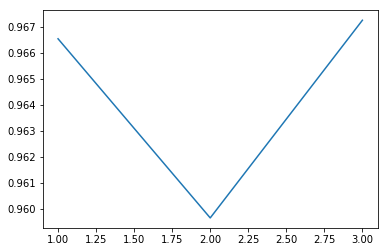

In [48]:
plt.plot(k_list, accuracy_list)
plt.show()

---
# Decision Tree

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=0).fit(X_tr, y_tr)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.857023809524


In [50]:
clf.score(X_test, y_test)

0.85702380952380952

# Predictions using KNN with 3 Nearest Neigbors model

In [54]:
# Final Model with all the train data:
knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)
test_data['Label'] = knn.predict(test_data.values)

test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [55]:
# Visualizing and checking label of a random image
index_of_img = random.randrange(test_data.shape[0])
print('Test Data: Label of image at Index {} is {}'.format(index_of_img,test_data['Label'][index_of_img]))
img_visualizer(test_data.iloc[:,:-1].iloc[index_of_img,:].values)

Test Data: Label of image at Index 16784 is 8


In [57]:
final = test_data['Label'].reset_index(drop=False)
final["ImageId"] = final["index"] + 1

i = 0
while os.path.exists("./predictions/final_predictions%s.csv" % i):
    i += 1

final[["ImageId", "Label"]].to_csv('./predictions/final_predictions%s.csv' %i,index=False)

print('Prediction file "{}" written to "predictions folder" in root directory'.\
      format('final_predictions%s.csv' %i))

Prediction file "final_predictions0.csv" written to "predictions folder" in root directory


---